# Proyek Analisis Data: Nama dataset
- Nama: Rama Nusa Bakti
- Email: ramanusabakti03@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Penghasilan berdasarkan rentang waktu
- Informasi tentang product dan yang lainnya

In [1]:
!gdown "1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK"

Downloading...
From: https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
To: /content/E-commerce-public-dataset.zip
100% 44.9M/44.9M [00:00<00:00, 48.9MB/s]


In [2]:
import shutil,os

shutil.unpack_archive("/content/E-commerce-public-dataset.zip" , "")
os.rename("E-Commerce Public Dataset", "data")

## Menyiapkan semua library yang dibutuhkan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [6]:
customers = pd.read_csv("data/customers_dataset.csv")
geo = pd.read_csv("data/geolocation_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
products = pd.read_csv("data/products_dataset.csv")
product_cat = pd.read_csv("data/product_category_name_translation.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")

table = [customers,geo,orders,order_items,order_items,order_payments,order_reviews,products,product_cat,sellers]
table_name = ["customers","geo","orders","order_items","order_items","order_payments","order_reviews","products","product_cat","sellers"]

### Assessing Data

In [7]:
duplicated_data = {}

for i in range(len(table)-1):
  duplicated_data[table_name[i]] = table[i].duplicated().sum()

duplicated_data


{'customers': 0,
 'geo': 261831,
 'orders': 0,
 'order_items': 0,
 'order_payments': 0,
 'order_reviews': 0,
 'products': 0,
 'product_cat': 0}

In [8]:
empty_data = {}
for i in range(len(table)-1):
  empty_data[table_name[i].upper()] = dict(table[i].isna().sum())

empty_data

{'CUSTOMERS': {'customer_id': 0,
  'customer_unique_id': 0,
  'customer_zip_code_prefix': 0,
  'customer_city': 0,
  'customer_state': 0},
 'GEO': {'geolocation_zip_code_prefix': 0,
  'geolocation_lat': 0,
  'geolocation_lng': 0,
  'geolocation_city': 0,
  'geolocation_state': 0},
 'ORDERS': {'order_id': 0,
  'customer_id': 0,
  'order_status': 0,
  'order_purchase_timestamp': 0,
  'order_approved_at': 160,
  'order_delivered_carrier_date': 1783,
  'order_delivered_customer_date': 2965,
  'order_estimated_delivery_date': 0},
 'ORDER_ITEMS': {'order_id': 0,
  'order_item_id': 0,
  'product_id': 0,
  'seller_id': 0,
  'shipping_limit_date': 0,
  'price': 0,
  'freight_value': 0},
 'ORDER_PAYMENTS': {'order_id': 0,
  'payment_sequential': 0,
  'payment_type': 0,
  'payment_installments': 0,
  'payment_value': 0},
 'ORDER_REVIEWS': {'review_id': 0,
  'order_id': 0,
  'review_score': 0,
  'review_comment_title': 87656,
  'review_comment_message': 58247,
  'review_creation_date': 0,
  'revie

### Cleaning Data

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
indexData = products[products.product_weight_g.isna() == True].index
# Satu product bernama bebes dan satu product tidak memiliki name
products.drop(indexData , inplace=True)

In [11]:
datetime_column = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for i in datetime_column:
  orders[i] = pd.to_datetime(orders[i])

order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])


In [12]:
def impute_order_datetime(x,y):
  # x = target
  # y = patokan data yang membantu mencari selisih

  # Kita ambil data yang mau dihitung selisihnya untuk dicari rata-ratanya
  data = orders[[y,x]]
  # Hapus data yang kosong karena tidak bisa dihitung selisihnya
  data.dropna(inplace=True)

  # Kita cari selisihnya dan buat kolom baru bernama "time"
  time = data[x] - data[y]
  time = time.apply(lambda x: x.total_seconds())
  data["time"] = time

  # Cari rata-ratanya
  mean = round(data.time.mean())
  print("{} = {} detik / {} menit / {} jam / {} hari".format(x,mean,mean/60,mean/3600,mean/86400))

  # Data x yang kosong kita isi dengan data y +
  for i, j in orders.iterrows():
    if pd.isna(j[x]):
      orders.at[i,x] = orders.at[i,y] + pd.to_timedelta(mean, unit='s')

impute_order_datetime("order_approved_at","order_purchase_timestamp")
impute_order_datetime("order_delivered_carrier_date","order_approved_at")
impute_order_datetime("order_delivered_customer_date","order_delivered_carrier_date")

<ipython-input-12-ba79b478c0b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-12-ba79b478c0b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time"] = time


order_approved_at = 37509 detik / 625.15 menit / 10.419166666666667 jam / 0.4341319444444444 hari


<ipython-input-12-ba79b478c0b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-12-ba79b478c0b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time"] = time


order_delivered_carrier_date = 242374 detik / 4039.5666666666666 menit / 67.32611111111112 jam / 2.8052546296296295 hari


<ipython-input-12-ba79b478c0b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-12-ba79b478c0b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time"] = time


order_delivered_customer_date = 806195 detik / 13436.583333333334 menit / 223.94305555555556 jam / 9.330960648148148 hari


In [13]:
products["product_category_name"].fillna("unknown", inplace = True)
products["product_name_lenght"].fillna(round(products["product_name_lenght"].mean()), inplace = True)
products["product_description_lenght"].fillna(round(products["product_description_lenght"].mean()), inplace = True)
products["product_photos_qty"].fillna(products["product_photos_qty"].mode()[0], inplace = True)


## Visualization & Explanatory Analysis

### Pendapatan berdasarkan rentang waktu:

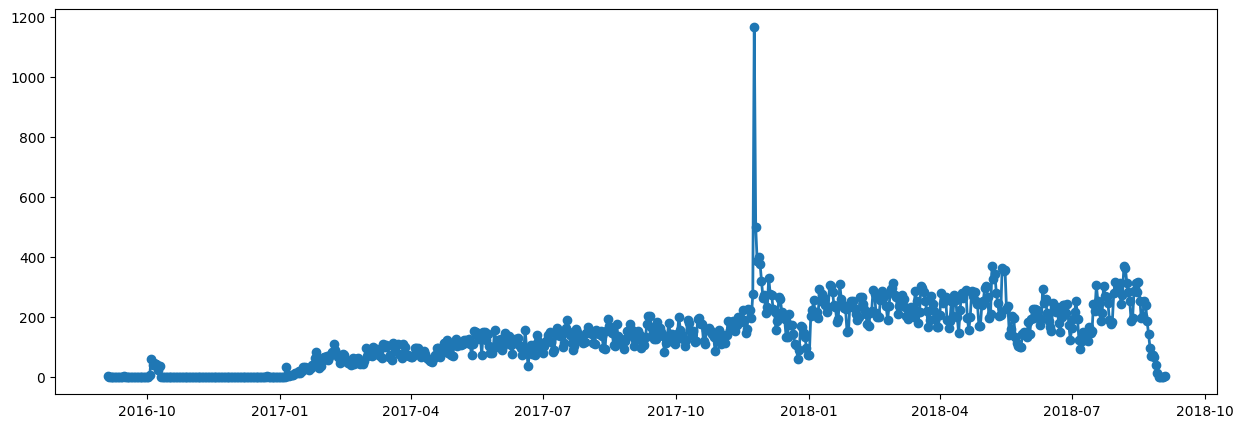

In [15]:
def revenue(start_date,end_date):
  df_orders = orders.query("order_status != 'canceled' & order_status != 'unavailable'")
  df_orders = df_orders.merge(order_items,on="order_id")
  df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
  daily_orders_df = df_orders.resample(rule="D", on='order_purchase_timestamp').agg({
          "order_id": "nunique",
          "price": "sum"
      }).reset_index()
  daily_orders_df.columns = ["date","order","revenue"]
  daily_orders_df = daily_orders_df.sort_values(by="date")
  daily_orders_df = daily_orders_df[(daily_orders_df["date"] >= str(start_date)) &
                    (daily_orders_df["date"] <= str(end_date))]
  daily_orders_df.reset_index(drop=True,inplace=True)
  return daily_orders_df

start_date = pd.to_datetime("2016/09/04")
end_date = pd.to_datetime("2018/10/17")
data_revenue = revenue(start_date,end_date)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(data_revenue["date"], data_revenue["order"], marker='o', linewidth=2)

### Informasi tentang produk dan yang lainnya:

<Axes: xlabel='revenue', ylabel='category'>

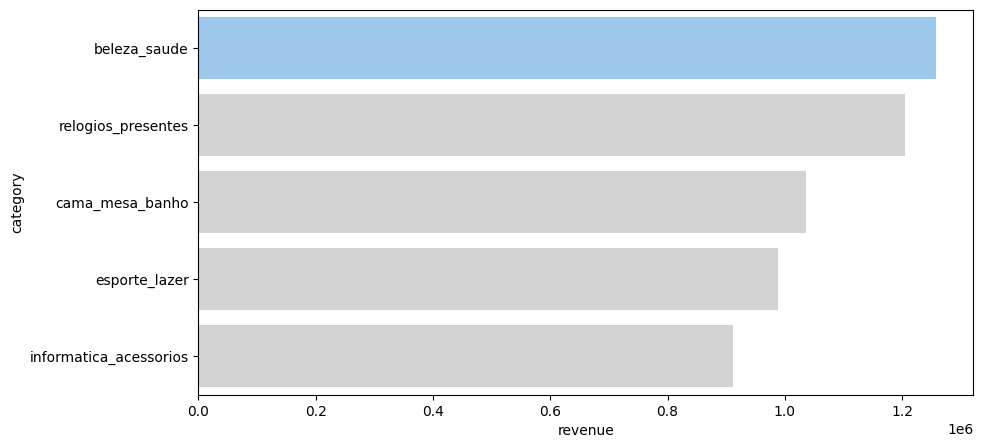

In [16]:
def product_revenue(asc):
  df_revenue = order_items.merge(products,on="product_id")
  df_revenue = df_revenue[["shipping_limit_date","product_id","price","product_category_name"]]
  df_revenue = df_revenue.groupby("product_category_name").price.sum().reset_index()
  df_revenue = df_revenue.sort_values(by="price",ascending=asc)
  df_revenue.columns = ["category","revenue"]
  df_revenue.reset_index(drop=True,inplace=True)
  return df_revenue

product_rev = product_revenue(False)
fig, ax = plt.subplots(figsize=(10, 5))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="revenue", y="category", data=product_rev.head(),
            label="Total", palette=colors)

In [17]:
def order(asc):
    highest = order_payments.merge(orders,on="order_id").reset_index()
    # kondisi terhadap kolom order_purchase_timestamp
    # highest = highest[highest.order_purchase_timestamp >= ??]
    highest = highest.sort_values(by="payment_value",ascending=asc)[["order_purchase_timestamp","payment_value"]]
    highest.columns = ["date","value"]
    highest.reset_index(drop=True,inplace=True)
    return highest

order(False)

,date,value
0,2017-09-29 15:24:52,13664.08
1,2018-07-15 14:49:44,7274.88
2,2017-02-12 20:37:36,6929.31
3,2018-07-25 18:10:17,6922.21
4,2017-05-24 18:14:34,6726.66
...,...,...
103881,2017-04-20 12:45:34,0.00
103882,2017-10-26 23:51:35,0.00
103883,2018-01-24 23:24:14,0.00
103884,2018-09-03 14:14:25,0.00


([<matplotlib.patches.Wedge at 0x7cba05e488b0>,
 [Text(-0.8380729510969203, 0.8257104478354985, 'credit_card'),
  Text(0.6561700443277138, -0.90739025759756, 'boleto'),
  Text(1.078676408125447, -0.2344724984077758, 'voucher'),
  Text(1.1002911599548018, -0.05218522884224389, 'debit_card'),
  Text(1.100002995268727, -0.00010202366949807416, 'not_defined')],
 [Text(-0.4819023648703762, 0.47479377181818505, '75%'),
  Text(0.3631804836947194, -0.5022271825770381, '19%'),
  Text(0.5900861226535477, -0.12826735285216675, '4%'),
  Text(0.60085258011171, -0.028497574582777085, '2%'),
  Text(0.6000029974192996, -5.564940074695522e-05, '0%')])

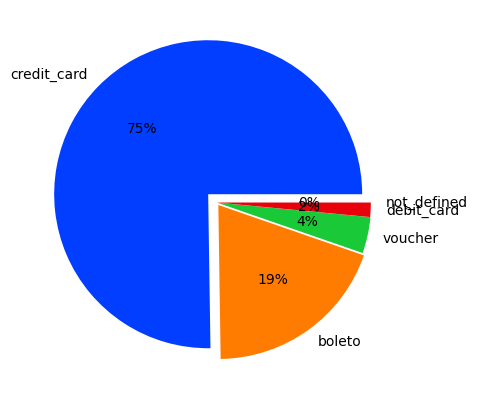

In [18]:
def payment_type():
  method = order_payments.merge(orders,on="order_id")[["order_id","payment_type","order_purchase_timestamp"]]
  # Gunakan kondisi terhadap kolom order_purchase_timestamp
  # method = method[method.order_purchase_timestamp >= ??]
  method = order_payments.groupby("payment_type").order_id.nunique().reset_index()
  method.columns = ["method","total"]
  method = method.sort_values(by="total",ascending=False)
  method.reset_index(drop=True,inplace=True)
  return method

method = payment_type()
fig, ax = plt.subplots(figsize=(5, 5))
palette_color = sns.color_palette('bright')
ax.pie(method.total, labels=method.method, colors=palette_color, explode=method.total/1000000, autopct='%.0f%%')

## Conclusion

- Saat ini penjualan cenderung menurun
- barang yang menghasilkan pendapatan terbesar adalah beleza_saude, order terbesar yang pernah dilakukan adalah senilai 13664.08 Real Brasil, metode pembayaran yang paling dilakukan adalah credit_card